In [1]:
import numpy as np
import pandas as pd 

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

voice.csv



In [2]:
voice = pd.read_csv("../input/voice.csv")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X, y = voice.iloc[:, :-1].values, voice.iloc[:, -1].values

In [3]:
gender_encoder = LabelEncoder()
y = gender_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

pipe_svc = Pipeline([('std_scl', StandardScaler()), 
                    ('pca', PCA(n_components=10)),
                    ('svc', SVC(random_state=1))])

pipe_svc.fit(X_train, y_train)

print('Test Accuracy: %.3f' % pipe_svc.score(X_test, y_test))

Test Accuracy: 0.976


Cross validation scores: [ 0.99215686  0.96850394  0.98031496  0.96442688  0.98023715  0.96837945
  0.98814229  0.99209486  0.98418972  0.97628458]


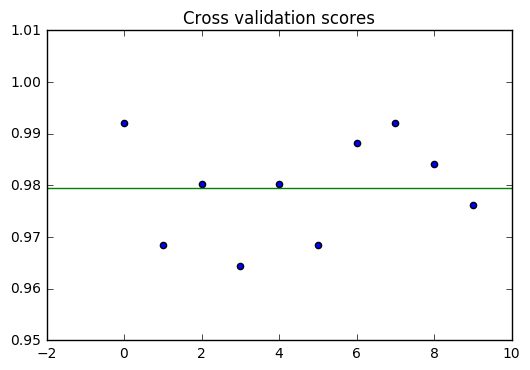

In [5]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_svc,
                        X=X_train,
                        y=y_train,
                        cv=10,
                        n_jobs=1)

print('Cross validation scores: %s' % scores)

import matplotlib.pyplot as plt
plt.title('Cross validation scores')
plt.scatter(np.arange(len(scores)), scores)
plt.axhline(y=np.mean(scores), color='g') # Mean value of cross validation scores
plt.show()